**Librerías**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import joblib
from pickle import dump

**Estructura sales_tab**

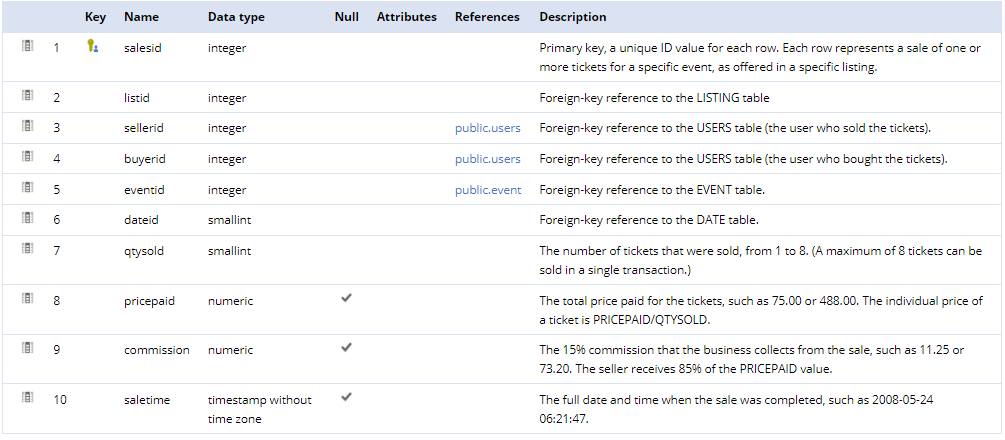

In [ ]:
data = pd.read_csv('/content/sales_tab.txt', sep="	", header=None)
data.columns = ["salesid", "listid", "sellerid", "buyerid", "eventid", "dateid", "qtysold", "pricepaid", "commission", "saletime"]
data.head()

,salesid,listid,sellerid,buyerid,eventid,dateid,qtysold,pricepaid,commission,saletime
0,1,1,36861,21191,7872,1875,4,728,109.20,2/18/2008 02:36:48
1,2,4,8117,11498,4337,1983,2,76,11.40,6/6/2008 05:00:16
2,3,5,1616,17433,8647,1983,2,350,52.50,6/6/2008 08:26:17
3,4,5,1616,19715,8647,1986,1,175,26.25,6/9/2008 08:38:52
4,5,6,47402,14115,8240,2069,2,154,23.10,8/31/2008 09:17:02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172456 entries, 0 to 172455
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   salesid     172456 non-null  int64  
 1   listid      172456 non-null  int64  
 2   sellerid    172456 non-null  int64  
 3   buyerid     172456 non-null  int64  
 4   eventid     172456 non-null  int64  
 5   dateid      172456 non-null  int64  
 6   qtysold     172456 non-null  int64  
 7   pricepaid   172456 non-null  int64  
 8   commission  172456 non-null  float64
 9   saletime    172456 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 13.2+ MB


In [ ]:
data["saletime"]=pd.to_datetime(data["saletime"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172456 entries, 0 to 172455
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   salesid     172456 non-null  int64         
 1   listid      172456 non-null  int64         
 2   sellerid    172456 non-null  int64         
 3   buyerid     172456 non-null  int64         
 4   eventid     172456 non-null  int64         
 5   dateid      172456 non-null  int64         
 6   qtysold     172456 non-null  int64         
 7   pricepaid   172456 non-null  int64         
 8   commission  172456 non-null  float64       
 9   saletime    172456 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 13.2 MB


In [ ]:
data = data.sort_values(["saletime"])

In [ ]:
data.head(10)

,salesid,listid,sellerid,buyerid,eventid,dateid,qtysold,pricepaid,commission,saletime
110327,110328,126347,6955,394,6213,1827,1,347,52.05,2008-01-01 01:00:19
97196,97197,110942,43282,515,7003,1827,2,708,106.20,2008-01-01 02:30:52
150313,150314,173969,48680,816,8762,1827,2,688,103.20,2008-01-01 03:50:02
65081,65082,73790,20429,451,1150,1827,4,472,70.80,2008-01-01 06:06:57
110916,110917,127048,37631,116,1749,1827,1,337,50.55,2008-01-01 07:05:02
88267,88268,100813,45818,698,8649,1827,4,836,125.40,2008-01-01 07:26:20
33094,33095,36572,30047,660,2903,1827,2,234,35.10,2008-01-01 09:41:06
157750,157751,206999,3003,157,6605,1827,1,1730,259.50,2008-01-01 12:50:55
165889,165890,222879,2186,664,6870,1827,2,4192,628.80,2008-01-01 12:59:34
1923,1924,2067,27144,256,6977,1828,2,494,74.10,2008-01-02 01:11:16


In [ ]:
X = data.drop(["salesid", "listid", "sellerid", "buyerid", "eventid", "dateid", "pricepaid", "commission"], axis=1)
X.reset_index(drop=True, inplace=True)
X.head(10)


,qtysold,saletime
0,1,2008-01-01 01:00:19
1,2,2008-01-01 02:30:52
2,2,2008-01-01 03:50:02
3,4,2008-01-01 06:06:57
4,1,2008-01-01 07:05:02
5,4,2008-01-01 07:26:20
6,2,2008-01-01 09:41:06
7,1,2008-01-01 12:50:55
8,2,2008-01-01 12:59:34
9,2,2008-01-02 01:11:16


In [ ]:
y = X['qtysold'].groupby(X['saletime'].dt.to_period('D')).sum()#.plot(kind='bar')
y.head()

saletime
2008-01-01     19
2008-01-02     57
2008-01-03     94
2008-01-04    157
2008-01-05    210
Freq: D, Name: qtysold, dtype: int64

In [ ]:
yy = np.array(y)
yy = np.reshape(yy,(-1,1))

In [ ]:
yy.shape

(365, 1)

In [ ]:
print(yy[0])

[19]


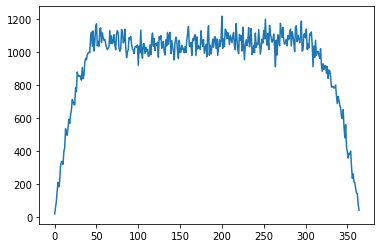

In [ ]:
plt.plot(yy)

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(yy)
TempN=sc.transform(yy)



In [ ]:
dump(sc, open('sc.pkl', 'wb'))

In [ ]:
joblib.dump(sc,'sc.pkl')

['sc.pkl']

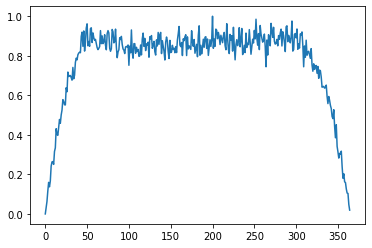

In [ ]:
plt.plot(TempN)

In [ ]:
Xtrain=np.zeros((292,10))
Ytrain=np.zeros((292,1))
for i in range(292):
    Xtrain[i,:]=TempN[i:i+10].T
    Ytrain[i]=TempN[i+10]
# Se adiciona una dimension a los tensores para ser trabajados por redes recurrentes
# ESto es el caso para series de tiempo y secuencias
# [batch size, time steps, dimensionality] dimensionality = 1 para series de tiempo
XtrainE=(np.expand_dims(Xtrain,2)) #2 en la posicion 
YtrainE=(np.expand_dims(Ytrain,2))
print(Xtrain.shape)
print(XtrainE.shape)
#print(Ytrain)

(292, 10)
(292, 10, 1)


In [ ]:
Xtest=np.zeros((62,10))
Ytest=np.zeros((62,1))
for i in range(62):
    Xtest[i,:]=TempN[293+i:293+i+10].T
    Ytest[i]=TempN[293+i+10]
# Se adiciona una dimension a los tensores para ser trabajados por redes recurrentes
# ESto es el caso para series de tiempo y secuencias
# [batch size, time steps, dimensionality] dimensionality = 1 para series de tiempo
XtestE=(np.expand_dims(Xtest,2))
YtestE=(np.expand_dims(Ytest,2))
print(Xtest.shape)
print(XtestE.shape)

(62, 10)
(62, 10, 1)


In [ ]:
np.save("Xtest.npy", Xtest)

# **Unidad LSTM**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 10)          480       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 320       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________


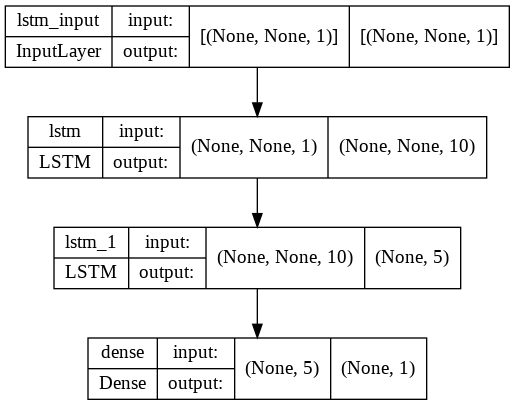

In [ ]:
modelo = keras.models.Sequential([
    keras.layers.LSTM(10, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(5),
    keras.layers.Dense(1)
])
modelo.summary()
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 13ms/step - loss: 0.0273


0.02725885808467865

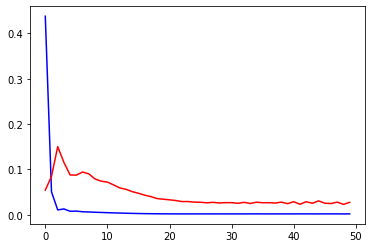

In [ ]:
tf.keras.backend.clear_session()
optimizer = keras.optimizers.Adam(lr=0.005)
modelo.compile(loss="mse", optimizer=optimizer)
history = modelo.fit(XtrainE,YtrainE, epochs=50,validation_data=(XtestE, YtestE),verbose = 0)
plt.plot(history.history["loss"],'b',history.history["val_loss"],'r')
modelo.evaluate(XtestE, YtestE)

0.027258858

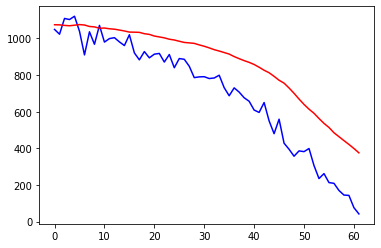

In [ ]:
#Predicción de un paso
Ypredic1=modelo.predict(XtestE)
Y_test = sc.inverse_transform(Ytest)
#Y_predict = sc.inverse_transform(Ypredic1)
plt.plot(Y_test,'b',sc.inverse_transform(Ypredic1),'r')
np.mean(keras.losses.mean_squared_error(Ytest, Ypredic1))

In [ ]:
np.save("Ypredic1",Ypredic1)

In [ ]:
last_predict = Xtest[-1][1:] 
#print(last_predict)
last_predict = np.hstack((last_predict,Ypredic1[-1])) # 9 ultimos mas 1 predict = 10
last_predict = np.reshape(last_predict,(-1,1))
#last_predict=sc.transform(last_predict)
lp = last_predict

lp = np.reshape(lp,(1,-1))
#print(lp)
final_predict = []
#print(lp.shape)
for i in range(7):

  prediction_7 = modelo.predict(lp)
  print('prediction:', prediction_7)
  final_predict.append(prediction_7)

  lp = lp[0][1:] 
  lp = np.append(lp,prediction_7) # 9 ultimos mas 1 predict = 10
  lp = np.reshape(lp,(1,-1))
final_predict = np.reshape(final_predict,(-1,1))
final_predict=sc.inverse_transform(final_predict)
print(final_predict.shape)


prediction: [[0.2908281]]
prediction: [[0.29515263]]
prediction: [[0.30707002]]
prediction: [[0.3213419]]
prediction: [[0.33998004]]
prediction: [[0.36052495]]
prediction: [[0.38392565]]
(7, 1)


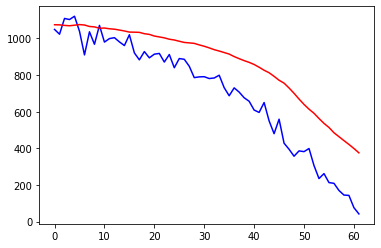

0.027258858

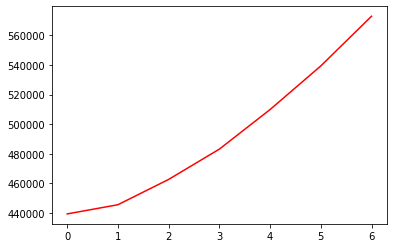

In [ ]:
plt.plot(Y_test,'b',sc.inverse_transform(Ypredic1),'r')
plt.show()
plt.plot(sc.inverse_transform(final_predict),'r')
np.mean(keras.losses.mean_squared_error(Ytest, Ypredic1))

In [ ]:
saved_model_path = "/content/tf_save"
save_options = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
modelo.save(saved_model_path, options=save_options)

INFO:tensorflow:Assets written to: /content/tf_save/assets


INFO:tensorflow:Assets written to: /content/tf_save/assets


In [ ]:
joblib.dump(modelo,'lstm_model.pkl')

INFO:tensorflow:Assets written to: ram://dc027b3c-6e5a-46dd-93fb-5e6a3987bd00/assets


INFO:tensorflow:Assets written to: ram://dc027b3c-6e5a-46dd-93fb-5e6a3987bd00/assets


['lstm_model.pkl']

In [ ]:
filePath = 'lstm_model.pkl'
file = open(filePath, "rb")
trained_model = joblib.load(file)

In [ ]:
last_predict = Xtest[-1][1:] 
#print(last_predict)
last_predict = np.hstack((last_predict,Ypredic1[-1])) # 9 ultimos mas 1 predict = 10
last_predict = np.reshape(last_predict,(-1,1))
#last_predict=sc.transform(last_predict)
lp = last_predict

lp = np.reshape(lp,(1,-1))
#print(lp)
final_predict = []
#print(lp.shape)
for i in range(7):

  prediction_7 = trained_model.predict(lp)
  print('prediction:', prediction_7)
  final_predict.append(prediction_7)

  lp = lp[0][1:] 
  lp = np.append(lp,prediction_7) # 9 ultimos mas 1 predict = 10
  lp = np.reshape(lp,(1,-1))
final_predict = np.reshape(final_predict,(-1,1))
final_predict=sc.inverse_transform(final_predict)
print(final_predict.shape)


prediction: [[0.2908281]]
prediction: [[0.29515263]]
prediction: [[0.30707002]]
prediction: [[0.3213419]]
prediction: [[0.33998004]]
prediction: [[0.36052495]]
prediction: [[0.38392565]]
(7, 1)
